# Mantid neutron data reduction demo

Welcome to the mantid neutron data demo! Please see the repo `readme` to see how to install mantid. 

In this tutorial, we will use the mantid framework to load, visualise and manipulate the neutron dataset you've downloaded from [dropbox](https://www.dropbox.com/scl/fo/kduv87wx4j2cc71u9lu97/AKy4Yn7Q_EAvXyd1jV0jd1w?rlkey=jcy7759n02vqc8ikwyglr5k30&st=rvf18jlv&dl=0).

In this notebook, mantid will be invoked using python scripting and some basic familiarity with python is assumed. 

To execute the content of one of the cells in the this notebook. Just select it and hit `shift-enter`!

## Step one: import mantid and some other useful tools

As with most python scripts, our script will begin with importing the modules we're going to use. Just select the cell below and hit `Shift-Enter` to run it.

If you see any errors at this stage, check your conda environment is activated!

In [1]:
from mantid.simpleapi import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib ipympl

FrameworkManager-[Notice] Welcome to Mantid 6.10.0
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid6.10
DownloadInstrument-[Notice] All instrument definitions up to date


## Get the data

The next step is to obtain the data, available on the dropbox file TODO: add link here.

mantid needs to know where the data are stored, so we will create a python string pointing to the directory. 

Nb: This should contain the complete path and for some operating systems exactly match the case. In my case, the data are stored in my Downloads folder, located at:  

```
/Users/66j/Downloads
```
So I will create the variable `dataPath` and set it equal to a string containing this location.

I also want to create a variable for the filename of my first dataset. I want to look at the silicon, which is: 

```
NIST_Silicon.nxs
```

I will create a variable called `dataFile` and set it equal to a string with this filename. Lastly, I'll create a third variable `dataSet` that combines these two values to give the complete location of the data. 

In [2]:
dataPath = "/Users/66j/Downloads"
dataFile = "NIST_Silicon.nxs"
dataSet = f"{dataPath}/{dataFile}"
print(f"full path to data set is: {dataSet}")

full path to data set is: /Users/66j/Downloads/NIST_Silicon.nxs


## Load the data into MANTID

I'm now ready to load my first dataset into mantid. I can do this with the mantid algorithm `LoadNexus`. This algorithm only requires two parameters be defined...

In [3]:
LoadNexus(Filename=dataSet,
          Outputworkspace='silicon')

LoadNexus-[Notice] LoadNexus started
ISISRunLogs-[Warning] Cannot find period log. Logs will be not be filtered by current period
ISISRunLogs-[Warning] Cannot find periods log. Logs will be not be filtered by current period
LoadNexus-[Notice] LoadNexus successful, Duration 2.01 seconds


EventWorkspace
Title: Calib: NIST Silicon 3mm coll at 50mm u/stream
Histograms: 18432
Bins: 500
Histogram
X axis: Time-of-flight / microsecond
Y axis: Counts per microAmp.hour
Distribution: False
Instrument: SNAP (2018-May-01 to 2100-Jan-31)Instrument from: /Users/66j/Downloads/NIST_Silicon.nxs

Run start: 2024-Aug-06 00:47:12
Run end:  2024-Aug-06 11:47:44

Events: 6584703 (weighted, no times)

This has created something called a `MANTID Event Workspace`. The header info tells you some useful information about the dataset.

The `EventWorkspace` contains many useful things: 

1. It contains the neutron event data. In this case, there are 6584703 events. (n.b. these are labelled as "weighted" because a compression algorithm has been run and they are labelled as "no times" as the arrival times of the events have been discarded. Both processes were done to reduce the size of the file)
2. It contains 18432 histograms, each containing 500 bins. These a histograms of the events, calculated for each of the 18432 pixels in this instrument. Since the X axis is "Time-of-flight" it means the histograms are calculated as a function of TOF (in $\mu s$.
3. It contains a complete mathematical description of the instrument. Including the spatial location of every pixel (based on an idealised default geometry)
4. It contains a large set of experimental logs. These contain information on many things including:
     * sample information
     * sample temperature, pressure logs
     * instrument configuration
     * many others


## Inspect the data

Here is an image to help visualise how these 18432 pixels are arranged inside two detectors: 

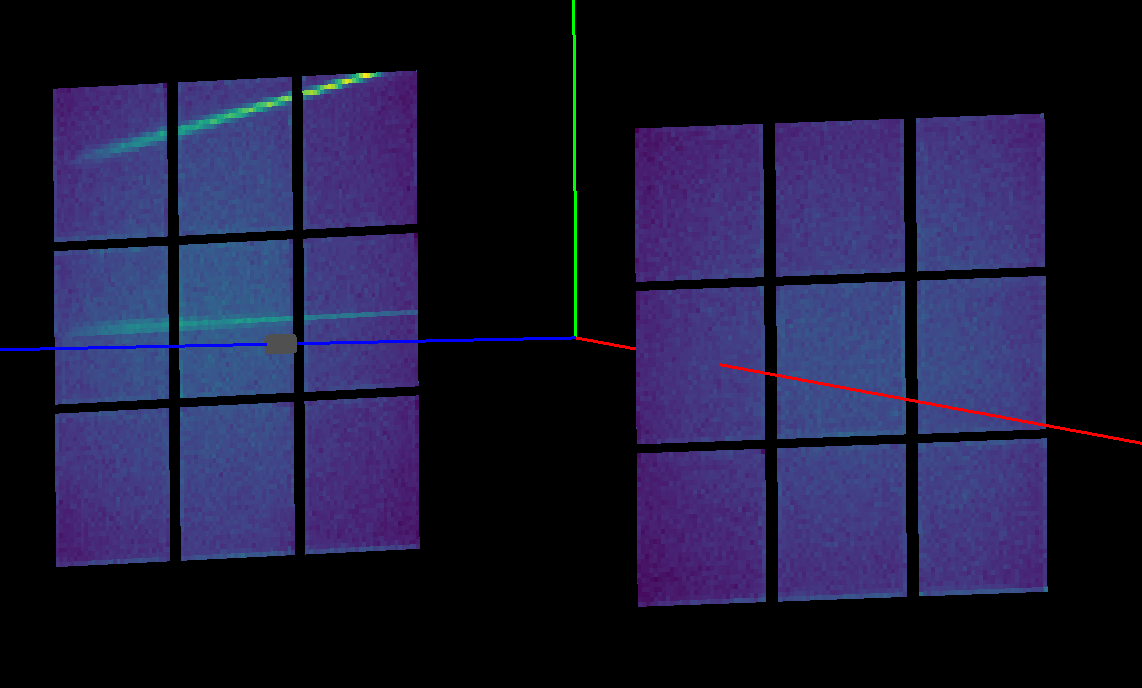

Here, the origin of the image is at the sample position, the green axis is vertical and the blue axis points paralle to the neutron beam. The instrument has two square detectors on opposite sides of the beam. Each detector is formed from 9 modules aligned in a 3x3 grid and each module has 32x32 pixels in it (32x32x9x2 = 18432).

The colour scale shows the total counts in each pixel. (Note that two gaps in the detector shielding led to the bright lines visible in the left-hand side detector!)

Now that we have a workspace holding our data, there are many mantid algorithms available that we can operate on it with. One of the first things we might want to do is convert the X-units from TOF to something more familiar, like d-spacing...

We can do this with a mantid algorithm called `ConvertUnits`:

In [4]:
ConvertUnits(InputWorkspace='silicon',
            OutputWorkspace='silicon',
            Target = 'dSpacing')

ConvertUnits-[Notice] ConvertUnits started
ConvertUnits-[Notice] ConvertUnits successful, Duration 0.11 seconds


EventWorkspace
Title: Calib: NIST Silicon 3mm coll at 50mm u/stream
Histograms: 18432
Bins: 500
Histogram
X axis: d-Spacing / Angstrom
Y axis: Counts per microAmp.hour
Distribution: False
Instrument: SNAP (2018-May-01 to 2100-Jan-31)Instrument from: /Users/66j/Downloads/NIST_Silicon.nxs

Run start: 2024-Aug-06 00:47:12
Run end:  2024-Aug-06 11:47:44

Events: 6584703 (weighted, no times)

(Note: since I gave the output workspace the same name as the input, I have overwritten the original)

If I look at the properties of the workspace, I now see the units are in d-spacing, but I still have 500 bins per spectrum. I know that this undersamples the diffraction peaks, so I want to rebin my neutron events with a finer binning:

In [5]:
Rebin(InputWorkspace='silicon',
      OutputWorkspace='silicon',
      Params='0.35,-0.0008,4.7')

Rebin-[Notice] Rebin started
Rebin-[Notice] Rebin successful, Duration 0.03 seconds


EventWorkspace
Title: Calib: NIST Silicon 3mm coll at 50mm u/stream
Histograms: 18432
Bins: 3248
Histogram
X axis: d-Spacing / Angstrom
Y axis: Counts per microAmp.hour
Distribution: False
Instrument: SNAP (2018-May-01 to 2100-Jan-31)Instrument from: /Users/66j/Downloads/NIST_Silicon.nxs

Run start: 2024-Aug-06 00:47:12
Run end:  2024-Aug-06 11:47:44

Events: 6584703 (weighted, no times)

Here, I defined the minimum d-spacing (0.35 Å), the maximum d-spacing (4.7 Å) and a binning parameter of 0.0008. The negative sign of the binning parameter is a convention to indicate _logarithmic_ binning. This generates data bins that are progressively larger at higher d-spacing to match the Bragg peak resolution and ensures approximately constant number of bins across each peak.

Now I might want to inspect the histograms in individual pixels. `Mantid Workbench` has several very useful visualisation tools. But in this notebook, another way to do it is using matplotlib. We'll define a short python function to make this easy to do.  

In [23]:
def plotSpectrum(idList,workspaceName):

    #First we need to define a handle, here just called ws, pointing at the workspace.
    ws = mtd[workspaceName]
    #via this handle, we now have access to a large number of methods that can allow us to access the content of the workspace

    
    #now we create a figure and a set of axes
    fig, ax = plt.subplots()
    for id in idList:
        xHist = ws.readX(id)
        x = 0.5*(xHist[:-1]+xHist[1:])
        y = ws.readY(id)
        ax.plot(x,y,label=f'spectrum {id}')

    ax.set_label('Spectra')
    ax.set_xlabel('d-Spacing')
    ax.set_ylabel('normalised Intensity')
    ax.legend()

You might noticed, I set this up to iterate through a list of input spectra ID's. This lets me examine more than one spectra plotted together. I have 18432 spectra available. Here is what the first and last spectra look like: 

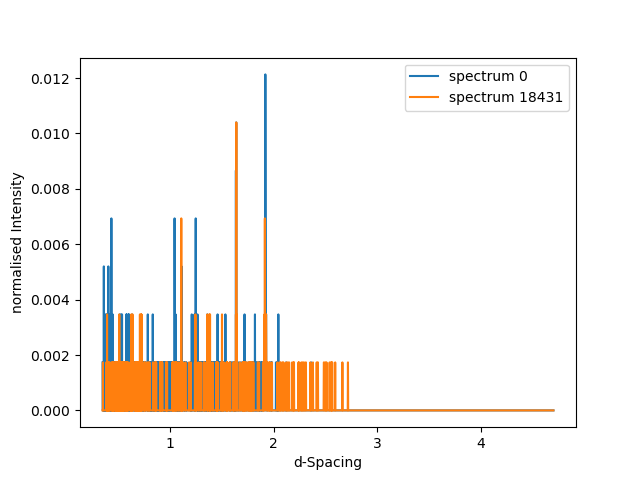

In [24]:
plotSpectrum([0,18431],'silicon')

This shows a rather unimpressive couple of spectra! The reason is that we're only plotting single pixels, which are very small, so don't have many counts.

**We need to add pixels together!!**

## Diffraction Focussing

The process of combining pixels is referred to as "diffraction focussing". This comes from analogy to focusing a lens: when the pixels are converted to d-spacing, any given Bragg peak always has the same value of d-spacing, so they line up or are "focussed".

On this particular instrument, we have a lot of flexibility on how to combine pixels. I could add all the pixels together into one single spectrum, but I am interested in looking at the angular dependence of the data. Mantid provides an easy way to define ways to group pixels based on the components of the detector via an algorithm called `CreateGroupingWorkspace`:   

In [8]:
CreateGroupingWorkspace(InputWorkspace='silicon', GroupDetectorsBy='Column', OutputWorkspace='SNAPColGp')

CreateGroupingWorkspace-[Notice] CreateGroupingWorkspace started
CreateGroupingWorkspace-[Notice] CreateGroupingWorkspace successful, Duration 0.06 seconds


CreateGroupingWorkspace_returns(OutputWorkspace=Title: 
Histograms: 18432
, NumberGroupedSpectraResult=18432, NumberGroupsResult=6)

Here I've defined groups according to the vertical columns of modules in each detector. This creates 6 pixel groups.

The next step is to combine these which is done with an algorithm called `DiffractionFocusing`:

In [9]:
DiffractionFocussing(InputWorkspace='silicon',
                     OutputWorkspace='silicon_columns',
                     GroupingWorkspace='SNAPColGp')                     

DiffractionFocussing-[Notice] DiffractionFocussing started
DiffractionFocussing-[Notice] DiffractionFocussing successful, Duration 0.06 seconds


EventWorkspace
Title: Calib: NIST Silicon 3mm coll at 50mm u/stream
Histograms: 6
Bins: 3248
Histogram
X axis: d-Spacing / Angstrom
Y axis: Counts per microAmp.hour
Distribution: False
Instrument: SNAP (2018-May-01 to 2100-Jan-31)Instrument from: /Users/66j/Downloads/NIST_Silicon.nxs

Run start: 2024-Aug-06 00:47:12
Run end:  2024-Aug-06 11:47:44

Events: 6584703 (weighted, no times)

We how have a new workspace `silicon_columns` that has 6 spectra. I want to use my function to plot all 6 of these together: 

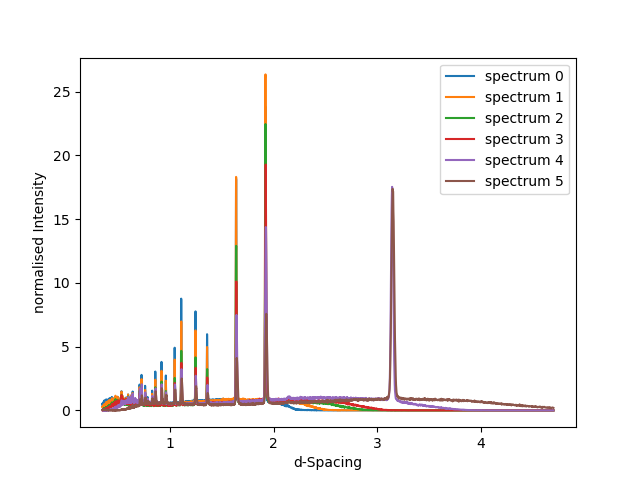

In [25]:
plotSpectrum([0,1,2,3,4,5],'silicon_columns')

These plots already show some of the properties of TOF detectors. The 2$\theta$ values of the columns decrease from low to high angle and we can see that: 

1. The maximum d-spacing increases towards low angle
2. The minimum d-spacing decreases towards high angle
3. The diffraction resolution (Bragg peak width) increases towards higher values.

But if we zoom in to, say the two peaks at 3.1 Å, we will see that they don't quite line up. This is due to errors in the default mathematical description of the instrument. To correct for this, we can apply a calibration. This calibration was already measured, and the calibration values (the "Diffractometer Constants") are stored in the provided file `diffract_consts.h5`. We need to apply that to the *unfocussed* workspace using another mantid algorithm and then diffraction focus again:  

ApplyDiffCal-[Notice] ApplyDiffCal started
ApplyDiffCal-[Notice] ApplyDiffCal successful, Duration 0.09 seconds
DiffractionFocussing-[Notice] DiffractionFocussing started
DiffractionFocussing-[Notice] DiffractionFocussing successful, Duration 0.12 seconds


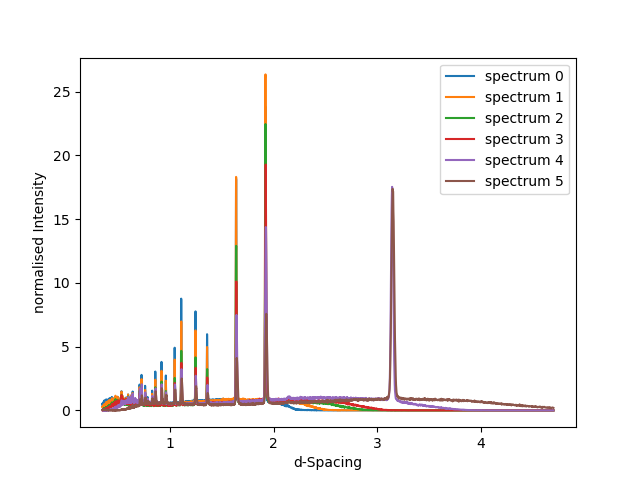

In [26]:
ApplyDiffCal(InstrumentWorkspace='silicon', 
             CalibrationFile='/Users/66j/Downloads/diffract_consts.h5')

DiffractionFocussing(InputWorkspace='silicon',
                     OutputWorkspace='silicon_columns',
                     GroupingWorkspace='SNAPColGp')

plotSpectrum([0,1,2,3,4,5],'silicon_columns')

TODO: Find correct calibration!!!!!